# Visualizing events in a CSGO demo
##### Last Updated: October 8, 2021

We will be using the `de_dust2` demo from [this match](https://www.hltv.org/matches/2344822/og-vs-natus-vincere-blast-premier-fall-series-2020) between OG and NAVI. We will discuss the basic visualization capabilities of the library. First, we must parse our demo.

In [1]:
from csgo.parser import DemoParser

p = DemoParser(demofile="og-vs-natus-vincere-m1-dust2.dem", parse_rate=64)

d = p.parse()

12:09:03 [INFO] Go version>=1.14.0
12:09:03 [INFO] Initialized CSGODemoParser with demofile /Users/pxenopoulos/Downloads/csgo-test/og-vs-natus-vincere-m1-dust2.dem
12:09:03 [INFO] Setting demo id to og-vs-natus-vincere-m1-dust2
12:09:03 [INFO] Setting parse rate to 64
12:09:03 [INFO] Setting trade time to 5
12:09:03 [INFO] Setting buy style to hltv
12:09:03 [INFO] Rollup damages set to False
12:09:03 [INFO] Parse frames set to True
12:09:03 [INFO] Running Golang parser from /Users/pxenopoulos/.pyenv/versions/3.8.6/lib/python3.8/site-packages/csgo-0.1-py3.8.egg/csgo/parser/
12:09:03 [INFO] Looking for file at /Users/pxenopoulos/Downloads/csgo-test/og-vs-natus-vincere-m1-dust2.dem
12:09:11 [INFO] Wrote demo parse output to og-vs-natus-vincere-m1-dust2.json
12:09:11 [INFO] Reading in JSON from og-vs-natus-vincere-m1-dust2.json
12:09:13 [INFO] JSON data loaded, available in the `json` attribute to parser
12:09:13 [INFO] Successfully parsed JSON output
12:09:13 [INFO] Successfully returned 

The base plotting function is `plot_map`, where we pass a map name, and either `type="original"` for the original map images, or `map_type="simpleradar"` for the SimpleRadar images. If using SimpleRadar, `dark=True` will set the map to use the dark theme.

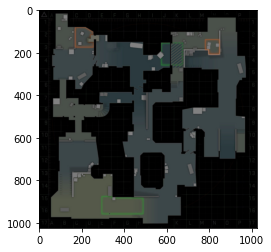

In [2]:
import matplotlib.pyplot as plt
from csgo.visualization.plot import plot_map

f, a = plot_map(map_name="de_dust2", map_type="original")
plt.show()

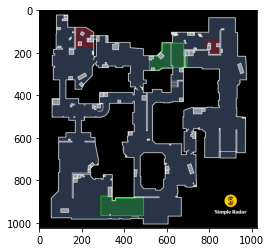

In [3]:
f, a = plot_map(map_name="de_dust2", map_type="simpleradar", dark=False)
plt.show()

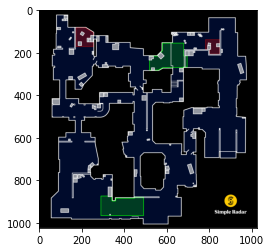

In [4]:
f, a = plot_map(map_name="de_dust2", map_type="simpleradar", dark=True)
plt.show()

There are two main functions, `plot_round()` and `plot_nades()`. The former will create a gif of player movements. The latter will plot the grenades. Below, we show them both in action. 

`plot_round()` can take a while to run. Basically, it creates all of the images, then combines them into the gif. The function will return `True`, or error out. When it finishes running, look for `best_round_ever.gif`.

In [6]:
from csgo.visualization.plot import plot_round

plot_round("best_round_ever.gif", d["gameRounds"][7]["frames"], map_name=d["mapName"], map_type="simpleradar", dark=False)

206it [01:19,  2.61it/s]


True

Next we can plot grenade throws using `plot_nades`. We have to pass a list of rounds, what grenades we are interested in plotting, what side we wish to plot, and then the regular plotting args, like map and map type

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

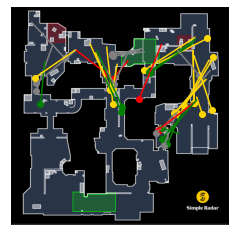

In [7]:
from csgo.visualization.plot import plot_nades

plot_nades(rounds=d["gameRounds"][7:10], nades=["Flashbang", "HE Grenade", "Smoke Grenade", "Molotov", "Incendiary Grenade"], side="CT", map_name="de_dust2", map_type="simpleradar", dark=False)